In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import scipy

In [2]:
path1 = r'E:\netData\MAGzip\MAG Nobel\2 Nobelpapers\1M NobelCitingpapers.zip'
path2 = r'E:\netData\MAGzip\MAG Nobel\2 Nobelpapers\712 Nobelpapers.zip'
path3 = r'E:\netData\MAGzip\MAG Nobel\2 Nobelpapers\712 NobelpapersCD.zip'

In [3]:
f1 = pd.read_csv(path1)
f2 = pd.read_csv(path2)
f3 = pd.read_csv(path3)

In [6]:
f1['Field'] = f1['Nobel'].map(f2.set_index('paperid')['Field'])
f11 = f1[f1['Field'] == 'Physics']
f12 = f1[f1['Field'] == 'Chemistry']
f13 = f1[f1['Field'] == 'Medicine']

In [7]:
f11

,Nobel,paperid,paperyear,cit,cit10,journal,ref,AUnum,title,type,Field
0,2086860422,2268233,2008.0,0.0,0.0,NaN,172.0,1.0,magnetic ordering in layered magnets,CC,Physics
1,2086860422,3275764,1987.0,8.0,2.0,ChemInform,85.0,1.0,magnetic phenomena in layered and intercalated...,CC,Physics
2,2086860422,5079868,1999.0,0.0,0.0,NaN,160.0,1.0,introduction to topological quantum numbers,CC,Physics
3,2086860422,8774471,2010.0,0.0,0.0,NaN,55.0,2.0,magnetism magnons and magnetic resonance,CC,Physics
4,2086860422,28214020,1989.0,0.0,0.0,NaN,12.0,3.0,problems of maximum entropy formalism in the s...,CC,Physics
...,...,...,...,...,...,...,...,...,...,...,...
453787,2150938918,2138511004,2005.0,5.0,5.0,IEEE Transactions on Electron Devices,8.0,4.0,development of electron guns for excimer light...,DC,Physics
453788,2150938918,2202889350,1978.0,9.0,3.0,Hist Stud Phys Sci,21.0,1.0,philipp lenard and the photoelectric effect 18...,DC,Physics
453789,2150938918,2482401064,1991.0,14.0,8.0,NaN,124.0,1.0,ion formation processes ionization in ion elec...,DC,Physics
453790,2150938918,2545446259,2016.0,0.0,0.0,NaN,76.0,1.0,passive focusing of intense ion beams,DC,Physics


# cit

In [14]:
x_pos = [1,2,]
colors = ["#1F618D","#AF601A"]
labels = ['Physics','Chemistry','Medicine']
d1 = f11.loc[f11['type'] == 'DC'  ,  'cit']
d2 = f12.loc[f12['type'] == 'DC'  ,  'cit']
d3 = f13.loc[f13['type'] == 'DC'  ,  'cit']
d5 = f11.loc[f11['type'] == 'CC'  ,  'cit']
d6 = f12.loc[f12['type'] == 'CC'  ,  'cit']
d7 = f13.loc[f13['type'] == 'CC'  ,  'cit']
d = [np.mean(d1),np.mean(d2),np.mean(d3),np.mean(d5),np.mean(d6),np.mean(d7)]
std = [np.std(d1)*len(d1)**-0.5,np.std(d2)*len(d2)**-0.5,np.std(d3)*len(d3)**-0.5,np.std(d5)*len(d5)**-0.5,np.std(d6)*len(d6)**-0.5,np.std(d7)*len(d7)**-0.5]

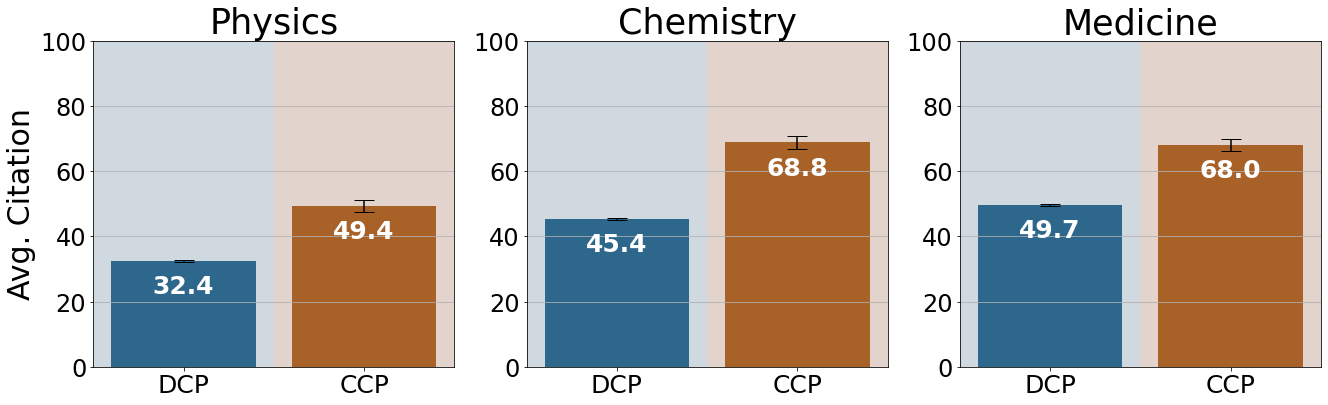

In [23]:
plt.subplots(1,3,figsize=(22,6))
for _ in range(3):
    ax = plt.subplot(1,3,_ + 1)
    dd = [d[_] , d[_+3]]
    plt.bar(x_pos, dd, yerr=[std[0],std[3]],align='center', color= colors,alpha=0.9,capsize=10)
    ax.yaxis.grid(True)
    plt.ylim((0,100))
    plt.xlim(0.5,2.5)
    for i in range(len(dd)):
        plt.text(x_pos[i],dd[i]-10 , str(np.round(dd[i] , 1)),fontsize = 25,c = 'white', ha='center', fontweight='bold')
    plt.xticks(x_pos,['DCP','CCP'],fontsize = 25)
    plt.yticks([0,20,40,60,80,100],size = 24)
    if _ == 0:
        plt.ylabel(r'Avg. Citation',fontsize = 30)
    else:
        plt.ylabel(r'',fontsize = 0)
    plt.title(labels[_],size = 35)
    ax.axvspan(min(x_pos)-1, max(x_pos) / 2+0.5, facecolor='#154360', alpha=0.2)
    ax.axvspan(max(x_pos) / 2+0.5, max(x_pos)+1, facecolor='#6E2C00', alpha=0.2)

In [20]:
print(scipy.stats.mannwhitneyu(d1 , d5, alternative='two-sided'))
print(scipy.stats.mannwhitneyu(d2 , d6, alternative='two-sided'))
print(scipy.stats.mannwhitneyu(d3 , d7, alternative='two-sided'))

MannwhitneyuResult(statistic=4328656298.0, pvalue=1.6873668070929475e-26)
MannwhitneyuResult(statistic=9806449839.5, pvalue=0.0)
MannwhitneyuResult(statistic=13355995706.0, pvalue=1.580590558957596e-173)


# cit10

In [24]:
d1 = f11.loc[f11['type'] == 'DC'  ,  'cit10']
d2 = f12.loc[f12['type'] == 'DC'  ,  'cit10']
d3 = f13.loc[f13['type'] == 'DC'  ,  'cit10']
d5 = f11.loc[f11['type'] == 'CC'  ,  'cit10']
d6 = f12.loc[f12['type'] == 'CC'  ,  'cit10']
d7 = f13.loc[f13['type'] == 'CC'  ,  'cit10']
d = [np.mean(d1),np.mean(d2),np.mean(d3),np.mean(d5),np.mean(d6),np.mean(d7)]
std = [np.std(d1)*len(d1)**-0.5,np.std(d2)*len(d2)**-0.5,np.std(d3)*len(d3)**-0.5,np.std(d5)*len(d5)**-0.5,np.std(d6)*len(d6)**-0.5,np.std(d7)*len(d7)**-0.5]

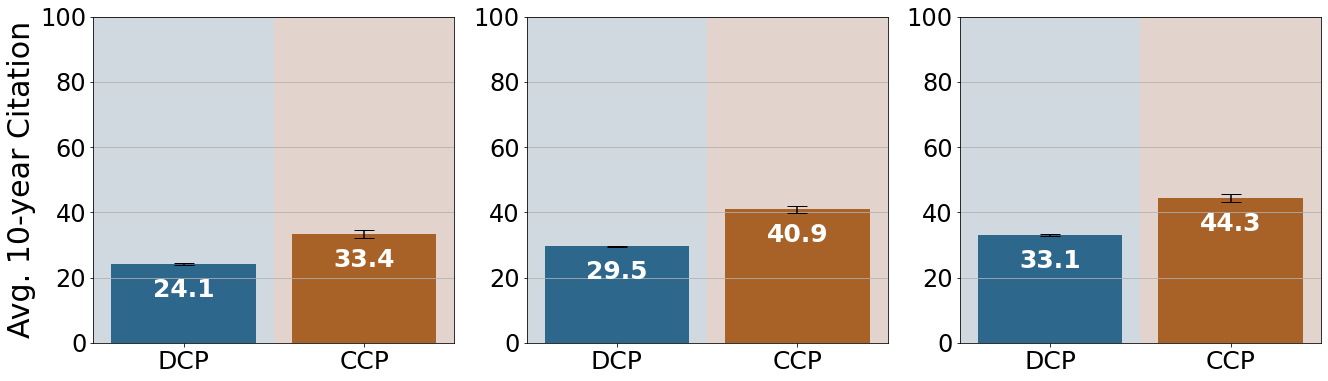

In [29]:
plt.subplots(1,3,figsize=(22,6))
for _ in range(3):
    ax = plt.subplot(1,3,_ + 1)
    dd = [d[_] , d[_+3]]
    plt.bar(x_pos, dd, yerr=[std[0],std[3]],align='center', color= colors,alpha=0.9,capsize=10)
    ax.yaxis.grid(True)
    plt.ylim((0,100))
    plt.xlim(0.5,2.5)
    for i in range(len(dd)):
        plt.text(x_pos[i],dd[i]-10 , str(np.round(dd[i] , 1)),fontsize = 25,c = 'white', ha='center', fontweight='bold')
    plt.xticks(x_pos,['DCP','CCP'],fontsize = 25)
    plt.yticks([0,20,40,60,80,100],size = 24)
    if _ == 0:
        plt.ylabel(r'Avg. 10-year Citation',fontsize = 30)
    else:
        plt.ylabel(r'',fontsize = 0)
#     plt.title(labels[_],size = 35)
    ax.axvspan(min(x_pos)-1, max(x_pos) / 2+0.5, facecolor='#154360', alpha=0.2)
    ax.axvspan(max(x_pos) / 2+0.5, max(x_pos)+1, facecolor='#6E2C00', alpha=0.2)

In [27]:
print(scipy.stats.mannwhitneyu(d1 , d5, alternative='two-sided'))
print(scipy.stats.mannwhitneyu(d2.dropna() , d6.dropna(), alternative='two-sided'))
print(scipy.stats.mannwhitneyu(d3.dropna() , d7.dropna(), alternative='two-sided'))

MannwhitneyuResult(statistic=4353690295.0, pvalue=2.4052170020990797e-19)
MannwhitneyuResult(statistic=9939291695.0, pvalue=1.9633974221207323e-237)
MannwhitneyuResult(statistic=13283958505.0, pvalue=6.71276558237654e-203)


# exclude 0

In [32]:
d1 = f11.loc[f11['type'] == 'DC'  ,  'cit']
d2 = f12.loc[f12['type'] == 'DC'  ,  'cit']
d3 = f13.loc[f13['type'] == 'DC'  ,  'cit']
d5 = f11.loc[f11['type'] == 'CC'  ,  'cit']
d6 = f12.loc[f12['type'] == 'CC'  ,  'cit']
d7 = f13.loc[f13['type'] == 'CC'  ,  'cit']
d1 = d1[d1!=0]
d2 = d2[d2!=0]
d3 = d3[d3!=0]
d5 = d5[d5!=0]
d6 = d6[d6!=0]
d7 = d7[d7!=0]
d = [np.mean(d1),np.mean(d2),np.mean(d3),np.mean(d5),np.mean(d6),np.mean(d7)]
std = [np.std(d1)*len(d1)**-0.5,np.std(d2)*len(d2)**-0.5,np.std(d3)*len(d3)**-0.5,np.std(d5)*len(d5)**-0.5,np.std(d6)*len(d6)**-0.5,np.std(d7)*len(d7)**-0.5]

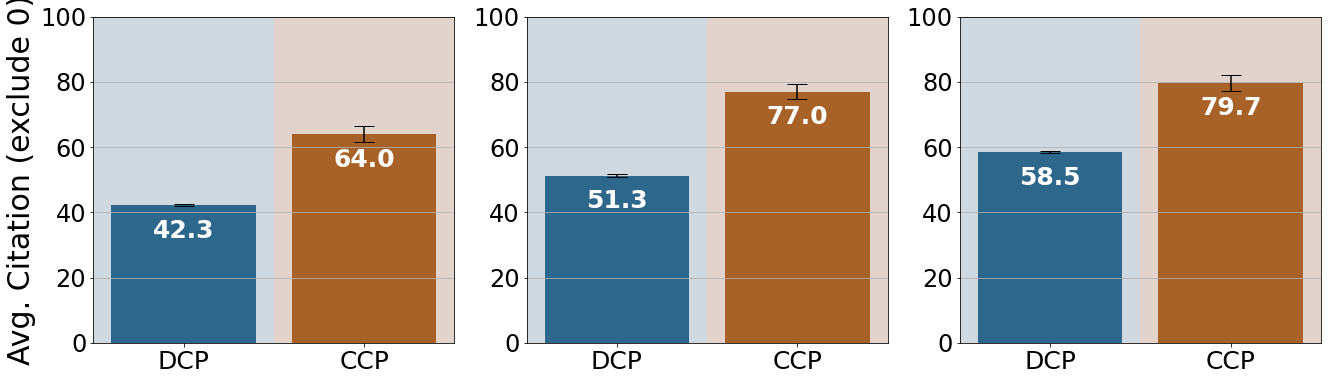

In [37]:
plt.subplots(1,3,figsize=(22,6))
for _ in range(3):
    ax = plt.subplot(1,3,_ + 1)
    dd = [d[_] , d[_+3]]
    plt.bar(x_pos, dd, yerr=[std[0],std[3]],align='center', color= colors,alpha=0.9,capsize=10)
    ax.yaxis.grid(True)
    plt.ylim((0,100))
    plt.xlim(0.5,2.5)
    for i in range(len(dd)):
        plt.text(x_pos[i],dd[i]-10 , str(np.round(dd[i] , 1)),fontsize = 25,c = 'white', ha='center', fontweight='bold')
    plt.xticks(x_pos,['DCP','CCP'],fontsize = 25)
    plt.yticks([0,20,40,60,80,100],size = 24)
    if _ == 0:
        plt.ylabel(r'Avg. Citation (exclude 0)',fontsize = 30)
    else:
        plt.ylabel(r'',fontsize = 0)
    ax.axvspan(min(x_pos)-1, max(x_pos) / 2+0.5, facecolor='#154360', alpha=0.2)
    ax.axvspan(max(x_pos) / 2+0.5, max(x_pos)+1, facecolor='#6E2C00', alpha=0.2)

In [35]:
print(scipy.stats.mannwhitneyu(d1 , d5, alternative='two-sided'))
print(scipy.stats.mannwhitneyu(d2 , d6, alternative='two-sided'))
print(scipy.stats.mannwhitneyu(d3 , d7, alternative='two-sided'))

MannwhitneyuResult(statistic=2516507783.0, pvalue=3.271351335777701e-41)
MannwhitneyuResult(statistic=7621243277.0, pvalue=0.0)
MannwhitneyuResult(statistic=9472944462.5, pvalue=1.3585798798756855e-259)


# 0-cited

In [41]:
d1 = f11.loc[f11['type'] == 'DC'  ,  'cit']
d2 = f12.loc[f12['type'] == 'DC'  ,  'cit']
d3 = f13.loc[f13['type'] == 'DC'  ,  'cit']
d5 = f11.loc[f11['type'] == 'CC'  ,  'cit']
d6 = f12.loc[f12['type'] == 'CC'  ,  'cit']
d7 = f13.loc[f13['type'] == 'CC'  ,  'cit']
d11 = d1[d1==0]
d12 = d2[d2==0]
d13 = d3[d3==0]
d15 = d5[d5==0]
d16 = d6[d6==0]
d17 = d7[d7==0]
d = [len(d11)/len(d1),len(d12)/len(d2),len(d13)/len(d3),len(d15)/len(d5),len(d16)/len(d6),len(d17)/len(d7)]

In [42]:
d

[0.23377985677643187,
 0.11566487378923646,
 0.1496973839867904,
 0.22861436729786594,
 0.10701881915838785,
 0.14748561843542085]

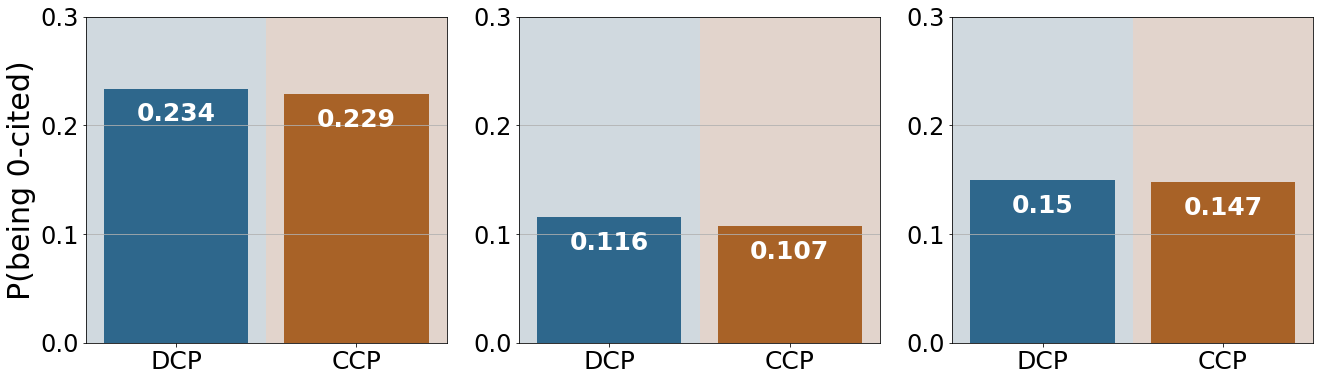

In [54]:
plt.subplots(1,3,figsize=(22,6))
for _ in range(3):
    ax = plt.subplot(1,3,_ + 1)
    dd = [d[_] , d[_+3]]
    plt.bar(x_pos, dd, color= colors,alpha=0.9)
    ax.yaxis.grid(True)
    plt.ylim(0,0.3)
    plt.xlim(0.5,2.5)
    for i in range(len(dd)):
        plt.text(x_pos[i],dd[i]-0.03 , str(np.round(dd[i] , 3)),fontsize = 25,c = 'white', ha='center', fontweight='bold')
    plt.xticks(x_pos,['DCP','CCP'],fontsize = 25)
    plt.yticks([0,0.1,0.2,0.3],size = 24)
    if _ == 0:
        plt.ylabel(r'P(being 0-cited)',fontsize = 30)
    else:
        plt.ylabel(r'',fontsize = 0)
    ax.axvspan(min(x_pos)-1, max(x_pos) / 2+0.5, facecolor='#154360', alpha=0.2)
    ax.axvspan(max(x_pos) / 2+0.5, max(x_pos)+1, facecolor='#6E2C00', alpha=0.2)